#Computing in Context
##Social Sciences Track
###Lecture 6
###Working with places

In [1]:
%matplotlib inline

## Key Examples


- Mapping the Republic of Letters (Stanford) 
https://web.stanford.edu/group/toolingup/rplviz/

- Franklin and Voltaire Correspondence
Winterer, "Where is American in the Republic of Letters," http://dx.doi.org/10.1017/S1479244312000212

- Million-dollar blocks http://spatialinformationdesignlab.org/projects.php%3Fid%3D16

- Spatial imagination https://web.stanford.edu/group/spatialhistory/cgi-bin/site/pub.php?id=93

- Digital Harlem  http://digitalharlem.org/


For detailed tutorials for historians, see Programming historian http://programminghistorian.org/lessons/#mapping-and-gis

##python the super wonderful data manipulator
### most work has been done in GUI environments:

- ArcGIS (expensive, Windows only, most major research universities have student licences)
- QGIS (open source, many platforms, irritating installation)

### lowest start up costs and great for initial run throughts

- Google Fusion Tables (in the "cloud" i.e. other people's computers) -- part of Google drive
- Google Earth



### loads of vocabulary and complications

Cartography *not* value neutral.

Mathematical choices have geopolitical significance.

See the classic work of David Harvey, *The New History of Maps*

to get intuitions:

how many ways to project a sphere onto a flat surface? 
Is Greenland bigger than Africa in your choice of projection? Is that ok?

##geocoding

###two key directions:
#### geolocation: getting longitude and latitude from addresses
#### reverse lookup: getting an address or site from longitude and latitude

key python package `geopy`
not by default in conda; you can get with `pip install geopy`.

We'll just use `requests` as the geocoding APIs are straightforward.


###geolocation
####convert an address or a place, e.g. "Columbia University" into longitude, latitude and more!

In [2]:
import requests
payload = {'address': 'Columbia University'}
r = requests.get("https://maps.googleapis.com/maps/api/geocode/json", params=payload)

#cf.:
#https://maps.googleapis.com/maps/api/geocode/json?sensor=false&address=Columbia+university
#NOTE you'll need an authentication key 
#so that Google doesn't get testy with you and stop giving results

In [3]:
r.json()

{'results': [{'address_components': [{'long_name': 'Columbia University',
     'short_name': 'Columbia University',
     'types': ['establishment']},
    {'long_name': '116th St', 'short_name': '116th St', 'types': ['route']},
    {'long_name': 'Manhattan',
     'short_name': 'Manhattan',
     'types': ['sublocality_level_1', 'sublocality', 'political']},
    {'long_name': 'New York',
     'short_name': 'NY',
     'types': ['locality', 'political']},
    {'long_name': 'New York County',
     'short_name': 'New York County',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'New York',
     'short_name': 'NY',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'United States',
     'short_name': 'US',
     'types': ['country', 'political']},
    {'long_name': '10027', 'short_name': '10027', 'types': ['postal_code']}],
   'formatted_address': 'Columbia University, 116th St, New York, NY 10027, USA',
   'geometry': {'bounds': {'nort

In [4]:
r.json()["results"][0]['geometry']['location']

{'lat': 40.8075355, 'lng': -73.9625727}

FYI: 

`geopy` just makes this a little easier:
Once you've intalled geopy, to initialize the geocoder:   

    from geopy.geocoders import GoogleV3
    my_google_key="<PUT YOURS HERE>"
    geolocator=GoogleV3(api_key=my_google_key)
    
Then to query it's simply:

    location=geolocator.geocode("<address here>")
    
or for address, lat and lon,

    address, lat, lon=geolocator.geocode("<address here>")

There are alternatives to the Google. OpenStreetMap's nominatim is an important example. 

In [5]:
payload = {'q': 'Columbia University', 'format':'json'}
r = requests.get("http://nominatim.openstreetmap.org/search/q", params=payload)

In [6]:
r.json()

[{'boundingbox': ['40.803416', '40.8106022', '-73.9671931', '-73.9571134'],
  'class': 'amenity',
  'display_name': 'Columbia University, College Walk, Morningside Heights, Manhattan, New York County, NYC, New York, 10027, United States of America',
  'icon': 'http://nominatim.openstreetmap.org/images/mapicons/education_university.p.20.png',
  'importance': 0.85109569521062,
  'lat': '40.8069705',
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright',
  'lon': '-73.9629328255825',
  'osm_id': '169626373',
  'osm_type': 'way',
  'place_id': '93935888',
  'type': 'university'},
 {'boundingbox': ['40.8155152', '40.819964', '-73.9607601', '-73.9546862'],
  'class': 'amenity',
  'display_name': 'Columbia University, West 131st Street, Manhattanville, Manhattan, New York, NYC, New York, 10027, United States of America',
  'icon': 'http://nominatim.openstreetmap.org/images/mapicons/education_university.p.20.png',
  'importance': 0.201,
  'lat': '40

In [7]:
r.json()[0]['lon']


'-73.9629328255825'

In [8]:
lon=r.json()[0]['lon']
lat=r.json()[0]['lat']


actually they need to be floats!

In [9]:
lon=float(r.json()[0]['lon'])
lat=float(r.json()[0]['lat'])

In [10]:
##Let's start with a list of places
places=["Reno, NV", "Somerville, MA", "New York, NY"]

In [11]:
lons=[]
lats=[]
for place in places:
    payload = {'q': place, 'format':'json'}
    r = requests.get("http://nominatim.openstreetmap.org/search/q", params=payload)
    lon=float(r.json()[0]['lon'])
    lat=float(r.json()[0]['lat'])
    lons.append(lon)
    lats.append(lat)
    
    ##FOR REAL CODE BUILD IN TRY....EXCEPT !!
    

In [12]:
lons

[-119.8136744, -71.0994968, -73.9865812]

##Exporting

Wild west of complicated different formats, legacy (shapefiles) and more recent (GeoJSON).

The key python package is `fiona`.


##Geographic visualization and python

*Lots* of packages, low and high level.

http://carsonfarmer.com/2013/07/essential-python-geo-libraries/

###For more interactive and aesthetically pleasing visualization, the future is with `vincent` and `bokeh`. 

Check them out; they are beautiful and easy to use.

##Extending matplotlib
We'll use the extension to `matplotlib` for contending with geographical data called `basemap`.

`Basemap` tutorials: https://basemaptutorial.readthedocs.org/en/latest/index.html

Builds on the full rich matplotlib world.


In [13]:
#first our imports
#may need to conda install basemap

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

## Key bit:

map = Basemap( blah blah ) 
sets up projection

###Not sure why didn't work in class!
#### example to see what can do 

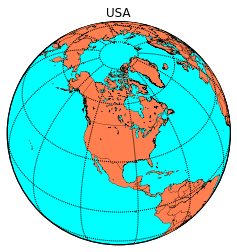

In [14]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
plt.title('USA')
plt.show()

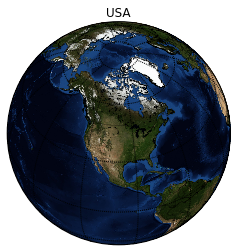

In [15]:
#now use with "blue marble visualization"

map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l') #not asking for high resolution!
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
# draw the edge of the map projection region (the projection limb)
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
map.bluemarble()
plt.title('USA')
plt.show()

### a more useful and basic example

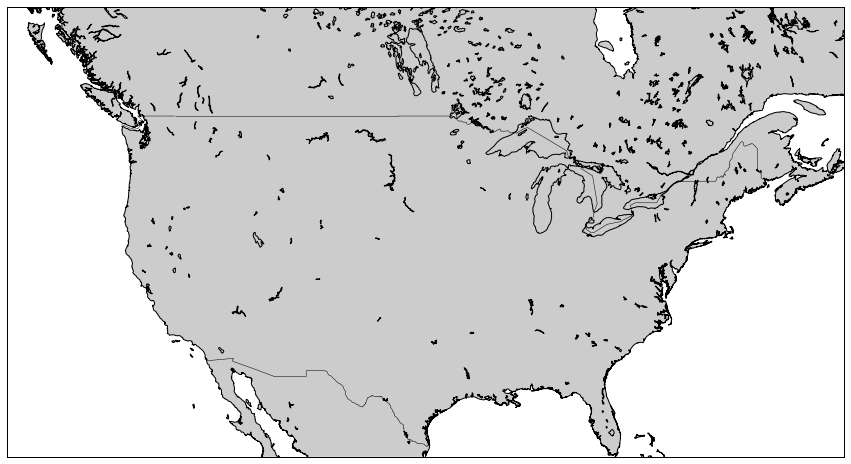

In [16]:
#Basic Map

fig = plt.figure(figsize=(15,12))

#choose projection
projection='merc'  #Mercator projection

#choose the rectangle we're interested in seeing by picking the left lower and right upper corner

x1 = -135.
x2 = -60.
y1 = 25.
y2 = 55.

# now initialize the map

m = Basemap(projection=projection, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1,
            urcrnrlon=x2, resolution="i")

# choose features to visualize

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color = '#CCCCCC')  

#finally plot
plt.show()

#cool! now let's add our places

WORKS JUST LIKE most matplotlib set ups

layer on top of map some data

our initialized map `m` can convert  latitudes and longitudes to coordiates for plotting

    x,y=m(longitude, latitude)
`m` can take either individual values or lists (as we made above)

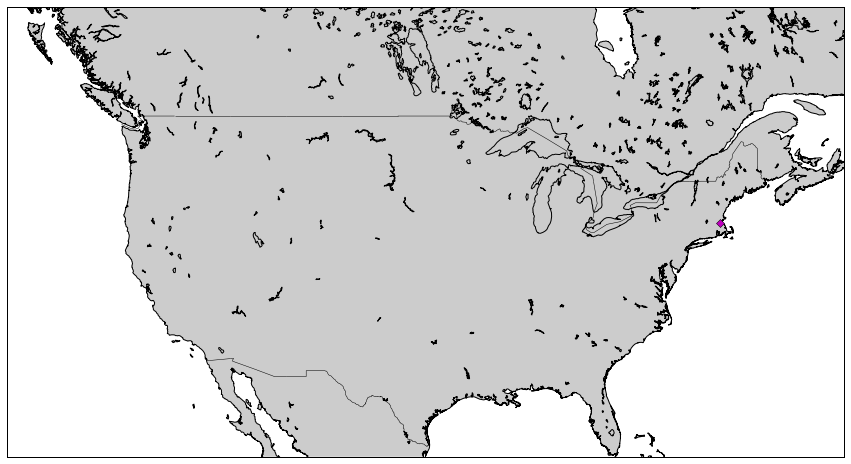

In [17]:
#start the same
fig = plt.figure(figsize=(15,12))
    
projection='merc'  #Mercator projection
x1 = -135.
x2 = -60.
y1 = 25.
y2 = 55.

m = Basemap(projection=projection, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1,
            urcrnrlon=x2, resolution="i")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color = '#CCCCCC')  

#now add the points to plot! the object m will convert lon, lat into coordinates to plot!
x,y=m(-71.0994968, 42.3)
m.plot(x,y,marker='D', color='m')
plt.show()

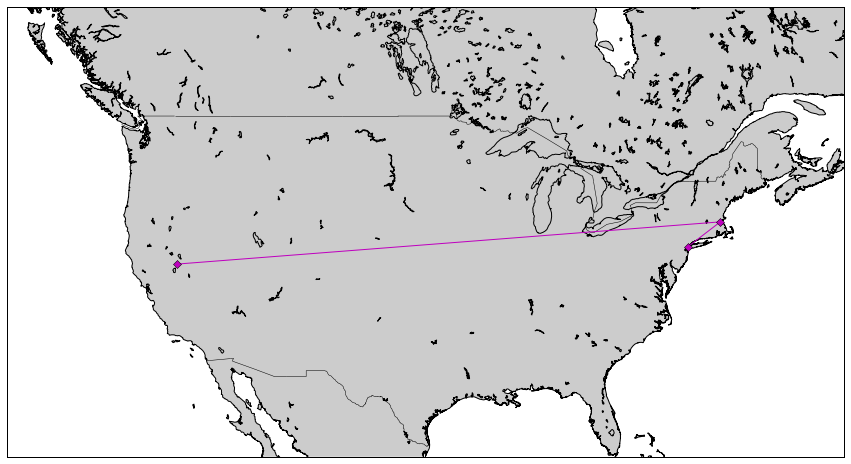

In [18]:
# now let's pass our list


fig = plt.figure(figsize=(15,12))
    
projection='merc'  #Mercator projection
x1 = -135.
x2 = -60.
y1 = 25.
y2 = 55.

m = Basemap(projection=projection, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1,
            urcrnrlon=x2, resolution="i")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
m.fillcontinents(color = '#CCCCCC')  

#now add the points to plot! the object m will convert a list of lon, and of list of lat into coordinates to plot!
x,y=m(lons, lats)
m.plot(x,y,marker='D', color='m')

plt.show()

##Plot would be good for plotting networks

Alternatively, for a simple example of combining `basemap` with `networkx`, see the answer code in https://stackoverflow.com/questions/19915266/drawing-a-graph-with-networkx-on-a-basemap

##that's cool but not what I was seeking!

use `scatter` instead to plot lists of lat, lon

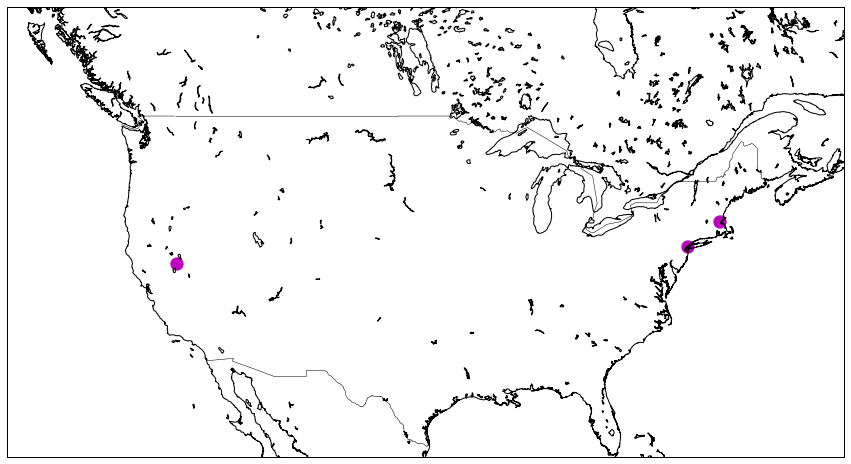

In [19]:
# once again, with feeling. or rather, with scatter

fig = plt.figure(figsize=(15,12))
    
projection='merc'  #Mercator projection
x1 = -135.
x2 = -60.
y1 = 25.
y2 = 55.

m = Basemap(projection=projection, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1,
            urcrnrlon=x2, resolution="i")
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()


#now add the points to plot! the object m will convert lon, lat into coordinates to plot!
x,y=m(lons, lats)
m.scatter(x,y,150,marker='o', color='m')
plt.show()

###Obviously you can generalize this.

- add names
- make size dependent on some numerical variable (population size)
- make color of shape dependent on some categorical variable (red city / blue city)

See https://basemaptutorial.readthedocs.org/en/latest/index.html for how to do each of these things

and for inspiration

see Nathan Yau, *Visualize This*, ch. 8 "Visualizing Spatial Differences", on-line for CU folks at http://www.columbia.edu/cgi-bin/cul/resolve?clio9683912

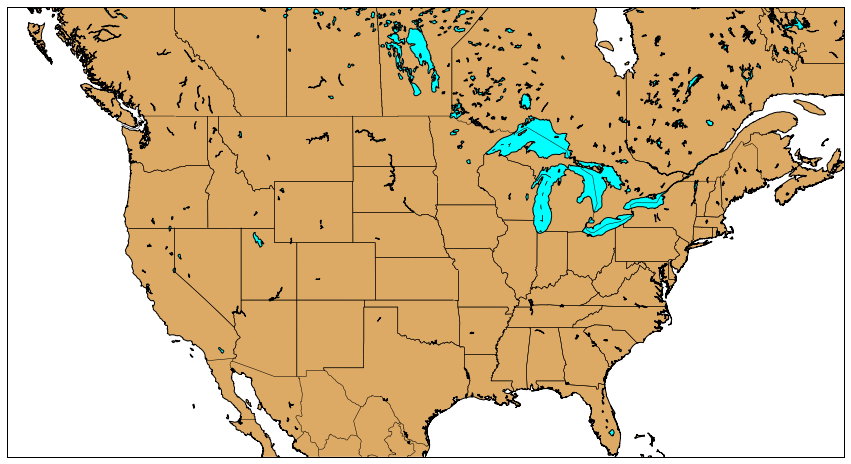

In [22]:
fig = plt.figure(figsize=(15,12))
    
projection='merc'  #Mercator projection
x1 = -135.
x2 = -60.
y1 = 25.
y2 = 55.

m = Basemap(projection=projection, llcrnrlat=y1, urcrnrlat=y2, llcrnrlon=x1,
            urcrnrlon=x2, resolution="i")
m.drawcoastlines()
m.drawmapboundary()
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcountries()

##add the states
m.drawstates()

plt.show()

##Combining data with maps

##Choropleth Maps
###to be supplied later!
###example


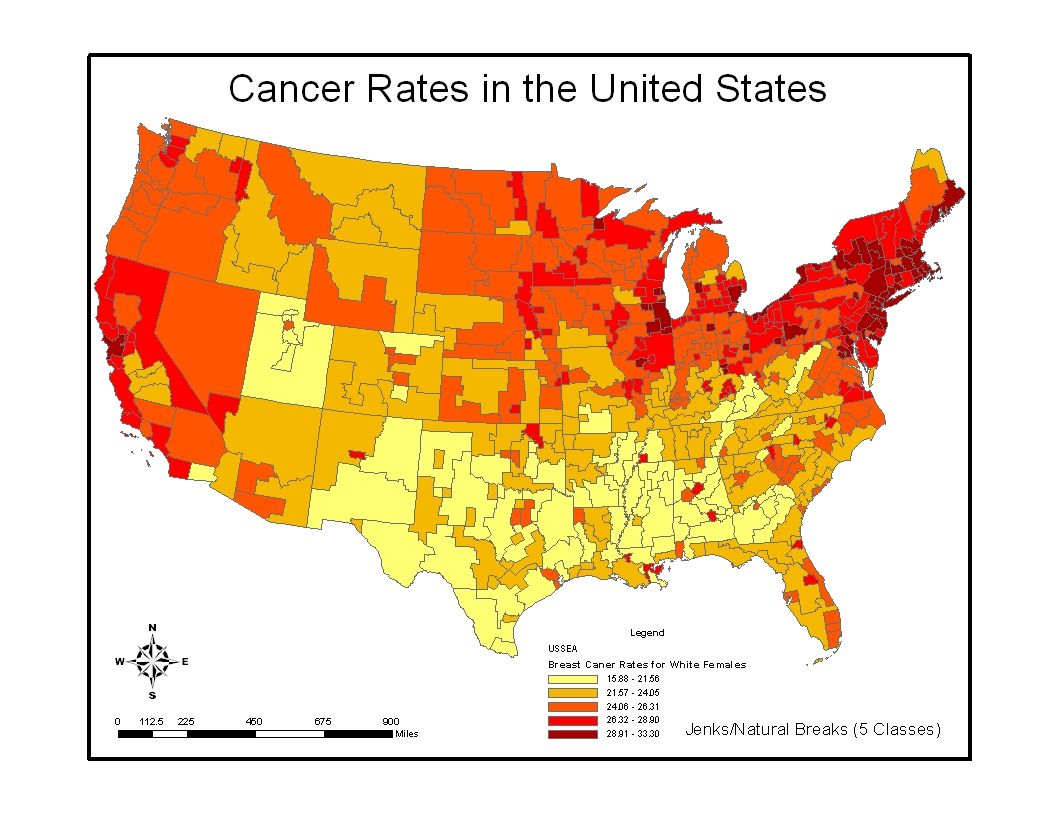

In [21]:
from IPython.display import Image
Image("https://www.msu.edu/~dougl126/images/cancer_rates_jenks.jpg")

#GIS, networks, text mining **too** easy
#Powerful but dangerous

##Letting us direct technology critically, rather than being ruled by it.

#"Raw data" is an oxymoron. 

*We* make data from sources: we don't find it pregiven.

> Data is made, not born: fully artificial

##Artificiality of data first moment of reflection
- who produced this data?
- is there a documented standard for this data? what interests produced this standard?
- what do and don't record?
- how frequently? Are these sensors calibrated? Are the people drunk half the time? What sort of drunk?
- what systems of classification used? 
- what thrown out and how?


##Against the *repressive hypothesis*
###Could treat as negative: 

artificial therefore false

Or artificial therefore way to create something positive

##Artificiality of data as positive critical stance

Not positivist social sciences,
not social sciences controlled by computation
but social sciences with computation tools, warts and afforances alike

#Triple problem of knowledge, ethics, and computational practice

##Documentation *more honest* and *more challenging*